In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/Users/haticekar/Desktop/anaconda/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import seaborn as sns

## Histograms
Filtering for US and Data Analyst data.

In [7]:
# Only get data analyst jobs in the US
df_DA_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=["salary_year_avg"])


df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,"[excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint']}"
410,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.0,NaN,Citi,"[sql, word, excel, visio, powerpoint, sharepoint]","{'analyst_tools': ['word', 'excel', 'visio', '..."
988,Data Analyst,DATA ANALYST (ONSITE),"Springfield, MA",via Indeed,Full-time,False,"New York, United States",2023-11-21 13:00:13,False,False,United States,year,62623.0,NaN,Springfield Public Schools,"[sql, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."
1413,Data Analyst,Junior BI Developer,"Atlanta, GA",via Ai-Jobs.net,Full-time,False,Georgia,2023-10-31 13:57:41,False,True,United States,year,71300.0,NaN,Guidehouse,"[sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782637,Data Analyst,Data Integration Analyst,"Germantown, WI",via ZipRecruiter,Full-time,False,"Illinois, United States",2023-01-20 06:18:43,True,False,United States,year,70000.0,NaN,Virtual Benefits Administrator,"[vba, sql, sql server]","{'databases': ['sql server'], 'programming': [..."
782798,Data Analyst,Reference Data Analyst,"New York, NY",via Ai-Jobs.net,Full-time,False,"New York, United States",2023-04-21 05:59:51,True,False,United States,year,111175.0,NaN,DRW,[terminal],{'other': ['terminal']}
783588,Data Analyst,Data Analytics Manager,"Chicago, IL",via Ladders,Full-time,False,"Illinois, United States",2023-01-09 06:01:18,False,False,United States,year,125000.0,NaN,"United Air Lines, Inc","[sql, r, python, hadoop, excel]","{'analyst_tools': ['excel'], 'libraries': ['ha..."
783866,Data Analyst,Lead Credit Bureau Data Analyst,"Des Plaines, IL",via Ladders,Full-time,False,"Illinois, United States",2023-06-02 06:02:06,False,True,United States,year,115000.0,NaN,Discover Financial Services,[unix],{'os': ['unix']}


### Original Code

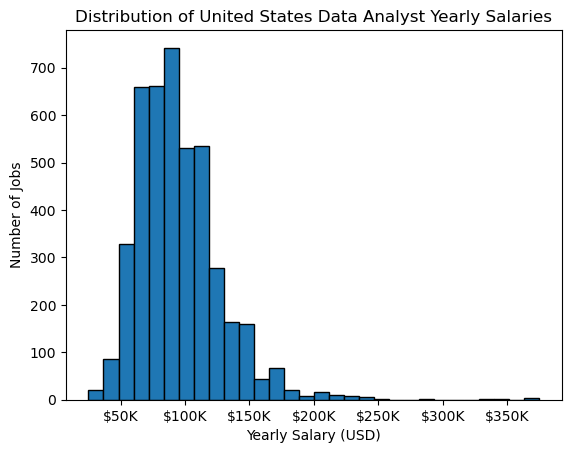

In [10]:
df_DA_US["salary_year_avg"].plot(kind="hist", bins=30, edgecolor="black")

plt.title("Distribution of United States Data Analyst Yearly Salaries")
plt.xlabel("Yearly Salary (USD)")
plt.ylabel("Number of Jobs")
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()

### Seaborn with KDE

Kernel density estimation (KDE) presents a different solution to the same problem. Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate.

### 🎯 Histogram ile KDE arasındaki fark anlatılıyor.
1. Histogram, verileri belli aralıklara (bin) bölüp her bir aralıktaki veri sayısını sayar. Yani veriyi kesikli (discrete) şekilde gösterir.
2. KDE ise, histogramın bu keskin ve basamaklı doğasını yumuşatır. Her veri noktasını birer küçük çan eğrisi (Gaussian kernel) gibi düşünür. 
3. Tüm bu eğriler toplanarak daha düzgün ve sürekli (continuous) bir dağılım eğrisi elde edilir.

### 📌 Seaborn’da Bu Ne İşe Yarar?
1. Histogram: Ham verilerin frekans dağılımını gösterir (barlar halinde).
2. KDE: Aynı verilerin yoğunluk eğrisini gösterir, daha şık ve anlamlı olabilir.

### Özetle:
* Bu açıklamada deniyor ki:
KDE, histogram gibi kesikli (bar-bar) değil, sürekli ve yumuşak bir eğriyle dağılımı gösterir. Bunu da her bir veri noktasının etrafına çan eğrisi (Gaussian) koyarak yapar.


##### Aşağıdaki kod parçası bir KDE (Kernel Density Estimation) grafiği çiziyor ve maaş verilerinin dağılımını estetik şekilde gösteriyor.
1. sns.displot(df_DA_US["salary_year_avg"], kind="kde", fill=True, common_norm=False): 
* 🔹 sns.displot(...) → Seaborn'un histogram ve KDE için kullanılan fonksiyonudur.
* 🔸 df_DA_US["salary_year_avg"] → Bu, ABD'deki veri analistlerinin yıllık maaşlarını temsil eden bir pandas serisidir.
* 🔹 kind="kde" → Histogram değil, KDE (yoğunluk eğrisi) çizileceğini belirtir.
* 🔹 fill=True → Eğrinin altı renkle doldurulsun.
* 🔹 common_norm=False → Eğer birden fazla grup olsaydı, her biri ayrı ayrı normalize edilecekti. Burada tek grup var ama yazılması sorun değil.

2. ax = plt.gca()
* 🔹 gca() → "get current axis" demek. Mevcut grafiğin eksenlerine (ax) erişmeni sağlar.(Buradan sonra eksen üzerinde özel değişiklikler yapabilirsin.)

3. ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
* Örneğin 90000 değeri → $90K olarak yazılır.
* y/1000 → Binlik hale getiriyor (90.000 → 90)
* f'${int(...)}K' → $ simgesi ve K ile birlikte yazıyor.
* FuncFormatter(...) → Matplotlib’in özel eksen biçimlendirme aracıdır.

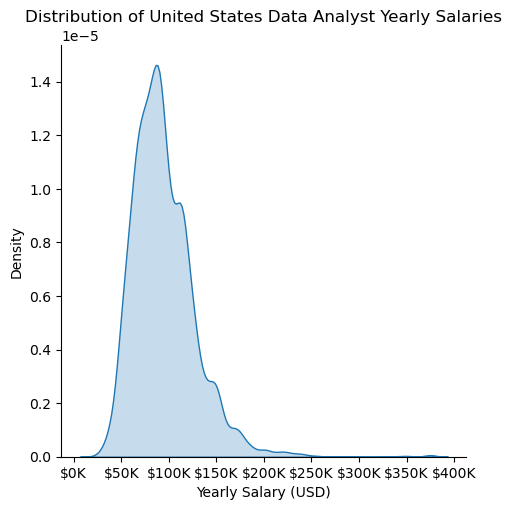

In [ ]:

sns.displot(df_DA_US["salary_year_avg"], kind="kde", fill=True, common_norm=False) 

# this is all the same
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Density') # Density is the probability of a random variable taking on a particular value
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

## Box Plots
Filtering for the top 3 jobs in the US.

1. job_list = [df_US[df_US["job_title_short"] == job_title]["salary_year_avg"] for job_title in job_titles]
* Bu satırda Python’un list comprehension yapısı kullanılıyor.
* Amaç: Her iş unvanı için yıllık maaş listesini ayrı ayrı oluşturmak.
###### Örnek:

* df_US[df_US["job_title_short"] == "Data Analyst"]["salary_year_avg"]
* → Sadece Data Analyst olanların maaşları
* Aynısı Data Engineer ve Data Scientist için de yapılır.
* job_list sonucu şöyle bir liste olur: [Data Analyst maaş serisi, Data Engineer maaş serisi, Data Scientist maaş serisi]




In [13]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter for the job titles and country
df_US = df[(df["job_title_short"].isin(job_titles)) & (df["job_country"] == "United States")].dropna(subset=["salary_year_avg"])

# list of salaries for each job title
job_list = [df_US[df_US["job_title_short"] == job_title]["salary_year_avg"] for job_title in job_titles]

1. 🔹 plt.boxplot(job_list, labels=job_titles, vert=False)
* job_list: Her bir iş unvanına ait yıllık maaşların listesi (önceki adımdan geliyor).
* labels=job_titles: Her kutu grafiğine karşılık gelen etiketi belirler: ['Data Analyst', 'Data Engineer', 'Data Scientist'].
* vert=False: Kutuların yatay çizilmesini sağlar.
* 📊 Boxplot, verinin minimum, Q1, medyan, Q3 ve maksimum değerlerini gösterir. Aykırı değerler de nokta olarak işaretlenir.

2. 🔹 ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
* Bu satır, X eksenindeki sayıları binlik (K) formatta dolar cinsinden göstermek için özel bir format tanımlar:
* Örneğin 200000 → $200K
* int(y/1000) → Sayıyı 1000’e bölüp tam sayıya çeviriyor.
* f'${...}K' → Dolar işareti ve K ile gösteriliyor.

3. 🔹 plt.gca().xaxis.set_major_formatter(ticks_x)
* gca() → "Get current axis": Mevcut eksen nesnesini döndürür.
* xaxis.set_major_formatter(...) → X eksenindeki ana değerlerin biçimini belirler.
* Bu, az önce tanımladığımız ticks_x fonksiyonunu uygular.

/var/folders/8p/5x_4dm3s1s9dfl4ncvnchlv00000gn/T/ipykernel_3288/2405738852.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


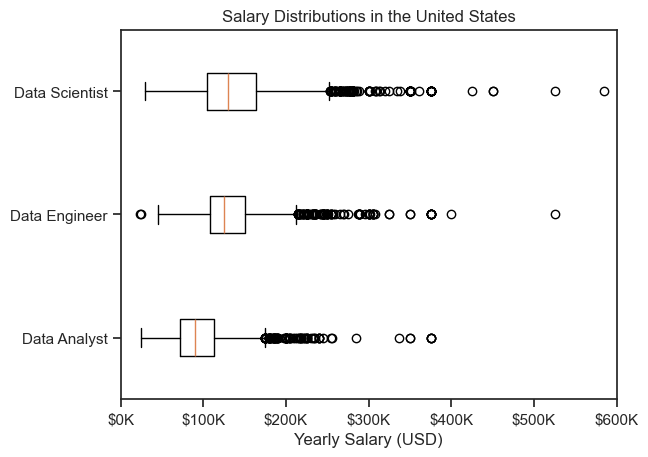

In [22]:
#Original Code
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

### Seaborn with Box Plots

##### Yukarıdaki kod ile farkı şudur: 
📌 Özellikleri:
* Seaborn kullanılır (Matplotlib’in üstünde çalışır ama daha güçlüdür).
* data=... → doğrudan DataFrame verisi kullanılır.
* x ve y parametreleri sütun isimleridir → çok daha esnek!
* Seaborn otomatik olarak gruplama yapar (örneğin farklı unvanlara göre).
* Daha gelişmiş temalar, renk paletleri, estetikler kullanılabilir.
* sns.set_theme(style="ticks") : -> Seaborn’un tema stilini “ticks” olarak ayarlıyor. Daha şık, modern görünüm sağlar.




| Özellik                         | `plt.boxplot`                            | `sns.boxplot`                             |
|----------------------------------|-------------------------------------------|--------------------------------------------|
| Kütüphane                        | Matplotlib                                | Seaborn                                     |
| Veri Tipi                       | List of Series (manually hazırlanmalı)    | DataFrame (direkt sütun isimleriyle)       |
| Etiketler                       | Elle verilir (`labels=...`)              | Otomatik olarak `y` ekseninden gelir        |
| Yön Belirleme (`vert`)          | `vert=True/False` ile belirlenir         | Ekseni ters çevirerek (`x`, `y`) yapılır   |
| Tema ve Stil                    | Sınırlı                                  | Seaborn temaları ve stilleriyle gelişmiş   |
| Gruplama                        | Manual (liste halinde)                   | Otomatik (veri sütununa göre)              |
| Estetik Ayarlar (hue, palette) | Yok                                      | Var (renk, şeffaflık, çizgi kalınlığı vb.) |
| Uygulama Kolaylığı             | Daha fazla manuel işlem gerekir           | Daha kısa ve esnek kod                     |


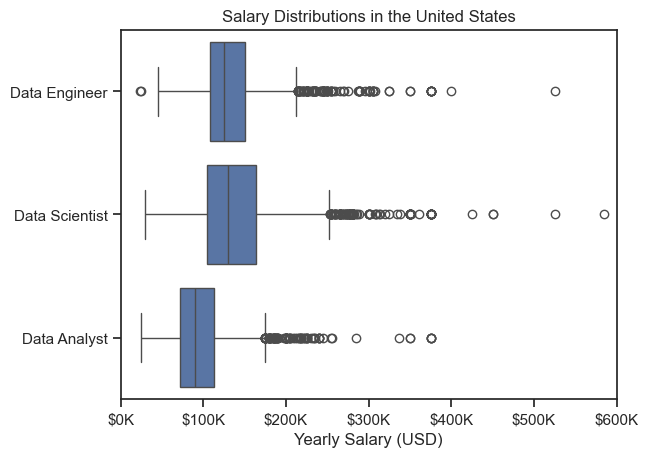

In [20]:
sns.boxplot(data=df_US, x="salary_year_avg", y="job_title_short")
sns.set_theme(style="ticks")

# this is all the same
plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()


## Bar Plots
1. Get the highest paying skills.

In [23]:
df_DA_US = df_DA_US.explode("job_skills")

In [ ]:
df_DA_top_pay = df_DA_US.groupby("job_skills")["salary_year_avg"].agg(["count", "median"]).sort_values(by="median", ascending=False) #JOB SKİLLS sütununa göre salary_year_avg de count, median değerlerini hesaplıyor 
df_DA_top_pay = df_DA_top_pay.head(10)
df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


2. Get the highest demanded skills (match up highest count of skills and highest median salary by skill for data analyst).

In [ ]:
#job_skills bazında gruplanıyor. Her beceri için:count ve median ı hesaplıyor.
#sort_values da count ı yüksek olanı en başa alıyor 
df_DA_skills = df_DA_US.groupby("job_skills")["salary_year_avg"].agg(["count", "median"]).sort_values(by="count", ascending=False)

#İlk 10 beceri içinden bu kez en yüksek medyan maaşa göre yeniden sıralama yapılır.rada 
df_DA_skills = df_DA_skills.head(10).sort_values(by="median", ascending=False)
df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


3. Format our axis and plot using **Matplotlib**.

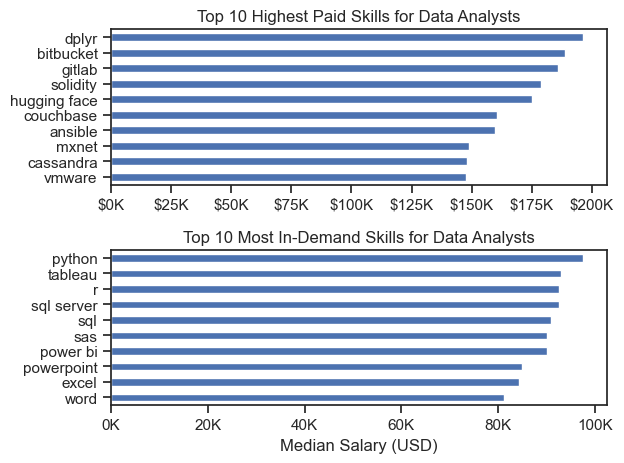

In [36]:
fig, ax = plt.subplots(2,1)

# Top 10 Highest Paid Skills for Data Analysts
df_DA_top_pay[::-1].plot(kind="barh", y="median", ax=ax[0], legend=False)
ax[0].set_title("Top 10 Highest Paid Skills for Data Analysts")
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# Top 10 Most In-Demand Skills for Data Analysts
df_DA_skills[::-1].plot(kind="barh", y="median", ax=ax[1], legend=False)
ax[1].set_title("Top 10 Most In-Demand Skills for Data Analysts")
ax[1].set_ylabel("")
ax[1].set_xlabel("Median Salary (USD)")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

plt.tight_layout()
plt.show()

### Use Seaborn

Now this graph is fine. But let's make it prettier with Seaborn.

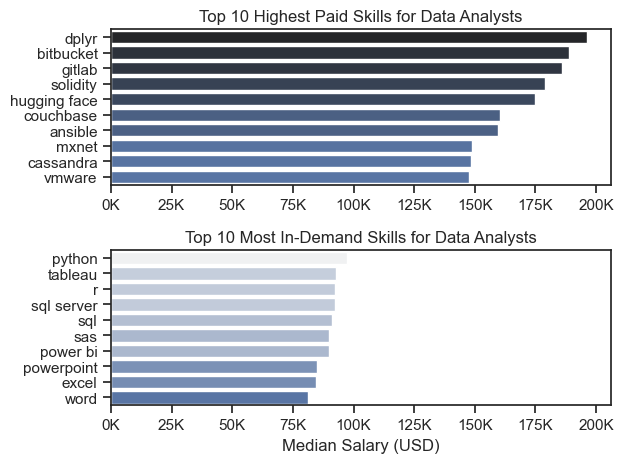

In [48]:
fig, ax = plt.subplots(2,1)

sns.set_theme(style="ticks")

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x="median", y= df_DA_top_pay.index, hue="median", ax=ax[0], palette="dark:b_r")
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 

ax[0].set_title("Top 10 Highest Paid Skills for Data Analysts")
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : f'{int(x/1000)}K'))

# Top 10 Most In-Demand Skills for Data Analystsr')
sns.barplot(data=df_DA_skills, x="median", y=df_DA_skills.index, hue="median", ax=ax[1], palette="light:b_r")
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title("Top 10 Most In-Demand Skills for Data Analysts")
ax[1].set_ylabel("")
ax[1].set_xlabel("Median Salary (USD)")
ax[1].set_xlim(ax[0].get_xlim()) # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_ : f'{int(x/1000)}K'))

plt.tight_layout()
plt.show()


1. fig, ax = plt.subplots(2, 1)
* fig: genel figür (çizim alanı)
* ax: 2 satırlı, 1 sütunlu iki eksen (ax[0], ax[1])
* ax[0]: üstteki grafik
* ax[1]: alttaki grafik

2. sns.set_theme(style="ticks")
* Seaborn grafikleri için şık bir tema uygular (ticks: hafif çizgili, sade bir stil).

3. sns.barplot(data=df_DA_top_pay, x="median", y=df_DA_top_pay.index, hue="median", ax=ax[0], palette="dark:b_r")
* data=df_DA_top_pay: Veriseti en yüksek maaş getiren 10 beceri.
* x="median": Medyan maaş, x ekseninde.
* y=df_DA_top_pay.index: Beceri isimleri (index’ten geliyor).
* hue="median": Her çubuğun rengi, maaşa göre ayarlanıyor.
* palette="dark:b_r": Koyu mavi-kırmızı renk skalası kullanılıyor.
* ax=ax[0]: İlk eksende çizdir (üst grafik).

4. ax[1].set_xlim(ax[0].get_xlim())
* İki grafik aynı X eksen ölçeğine sahip olacak şekilde hizalanır.


class seaborn.objects.Plot(*args, data=None, x=None, y=None, color=None, alpha=None, fill=None, marker=None, pointsize=None, stroke=None, linewidth=None, linestyle=None, fillcolor=None, fillalpha=None, edgewidth=None, edgestyle=None, edgecolor=None, edgealpha=None, text=None, halign=None, valign=None, offset=None, fontsize=None, xmin=None, xmax=None, ymin=None, ymax=None, group=None)
An interface for declaratively specifying statistical graphics.

1. from seaborn.objects import Plot, Mark
* p = Plot(data=df, x="age", y="salary") ----> df veri çerçevesini kullanır.  X eksenine "age", Y eksenine "salary" koyar.
* p += Mark()  ----> Mark() ile grafik işaretlemeleri yapılır (çizgi, nokta vs.).
* p.show()   -----> p.show() ile grafiği gösterir.

| Parametre     | Açıklama                                          | Örnek Kullanım            |
|---------------|----------------------------------------------------|----------------------------|
| `x`, `y`       | X ve Y eksenine gelecek veri sütunları             | `x="age", y="salary"`      |
| `data`         | Kullanılacak veri çerçevesi (DataFrame)           | `data=df`                  |
| `color`        | Renkleri kategoriye göre ayarlamak için kullanılır | `color="department"`       |
| `alpha`        | Saydamlık oranı (0 ile 1 arasında)                 | `alpha=0.7`                |
| `fill`         | Grafik öğesi içinin dolu olup olmayacağı           | `fill=True`                |
| `marker`       | Nokta şekli (örneğin daire, üçgen)                 | `marker="o"`               |
| `pointsize`    | Nokta boyutunu belirler                            | `pointsize=5`              |
| `stroke`       | Nokta/çizgi kenarlık kalınlığı                     | `stroke=1.5`               |
| `linewidth`    | Çizgi kalınlığı                                    | `linewidth=2`              |
| `linestyle`    | Çizgi tipi (düz, kesikli, noktalı vb.)             | `linestyle="--"`           |
| `fillcolor`    | Doldurma rengi                                     | `fillcolor="blue"`         |
| `fillalpha`    | Doldurma saydamlığı                                | `fillalpha=0.5`            |
| `edgewidth`    | Kenar çizgisi kalınlığı                            | `edgewidth=1`              |
| `edgestyle`    | Kenar çizgi tipi                                   | `edgestyle="dotted"`       |
| `edgecolor`    | Kenar çizgisi rengi                                | `edgecolor="black"`        |
| `edgealpha`    | Kenar çizgisi saydamlığı                           | `edgealpha=0.5`            |
| `text`         | Metin gösterimi için veri                          | `text="label"`             |
| `halign`       | Yatay hizalama                                     | `halign="center"`          |
| `valign`       | Dikey hizalama                                     | `valign="top"`             |
| `offset`       | Öğeyi kaydırmak için                              | `offset=(5, 5)`            |
| `fontsize`     | Yazı boyutu                                        | `fontsize=12`              |
| `xmin`, `xmax` | X ekseni sınırları                                 | `xmin=0, xmax=100`         |
| `ymin`, `ymax` | Y ekseni sınırları                                 | `ymin=0, ymax=50000`       |
| `group`        | Gruplandırma yapmak için                           | `group="category"`         |



